In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib as mpl
import pickle
import transformers
from matplotlib.lines import Line2D
import seaborn as sns
import json
from sklearn.manifold import TSNE
import torch
from sklearn.decomposition import DictionaryLearning, PCA, KernelPCA
from data_provider.data_split_recorder import split_recorder
from Prompts.Mapping_helper import Mapping_helper
def set_ax_linewidth(ax, bw=1.5):
    ax.spines['bottom'].set_linewidth(bw)
    ax.spines['left'].set_linewidth(bw)
    ax.spines['top'].set_linewidth(bw)
    ax.spines['right'].set_linewidth(bw)

def set_ax_font_size(ax, fontsize=10):
    ax.tick_params(axis='y',
                 labelsize=fontsize # y轴字体大小设置
                  ) 
    ax.tick_params(axis='x',
                 labelsize=fontsize # x轴字体大小设置
                  ) 

def set_draft(the_plt, other_ax=''):
    ax = the_plt.gca()
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    plt.xlabel('')
    plt.ylabel('')
    if other_ax:
        other_ax.axes.xaxis.set_ticklabels([])
        other_ax.axes.yaxis.set_ticklabels([])
        other_ax.set_ylabel('')
        other_ax.set_xlabel('')

def set_draft_fig(fig):
    for ax in fig.axes:
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])
        ax.set_ylabel('')
        ax.set_xlabel('')

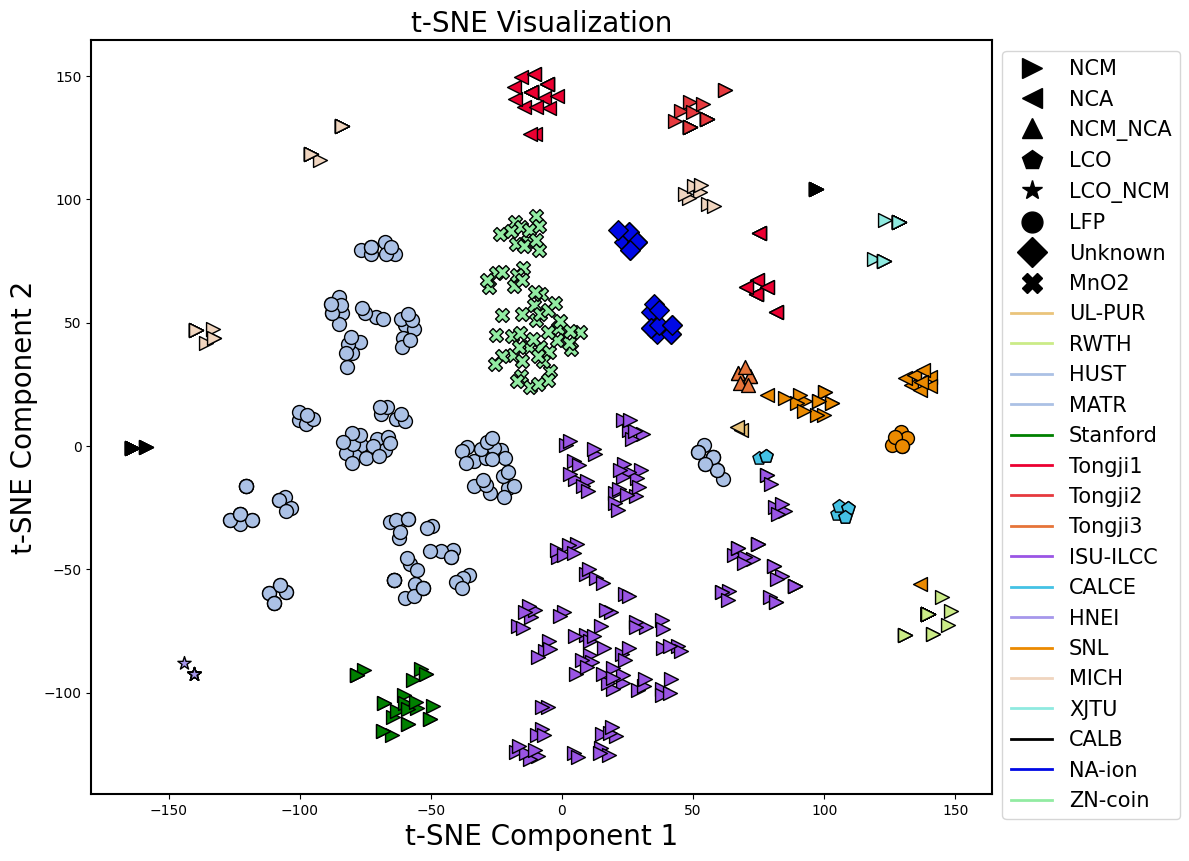

In [36]:


data_path = '/data/trf/python_works/BatteryLife/dataset/training_DKP_embed_all.pkl'
data = pickle.load(open(data_path, 'rb'))
tmp_total_features = np.array(list(data.values())).squeeze(1)
names = list(data.keys())


# Perform t-SNE on the embeddings (total_features)
# tsne = TSNE(n_components=2, random_state=42, perplexity=8)  # Reduce to 2D for visualization
# tsne_results = tsne.fit_transform(tmp_total_features)

tsne = TSNE(n_components=2, random_state=42, perplexity=8)  # Reduce to 2D for visualization
tsne_results = tsne.fit_transform(tmp_total_features)
dataset_names = [name.split('_')[0] for name in names]

fig = plt.figure(figsize=(12, 9))
# Define a list of different shapes for the clusters
cathodes_data = json.load(open('./gate_data/cathodes.json'))
cathode_names = ['_'.join(cathodes_data[i+'.pkl']) for i in names]

dataset_shape_map = {
    'NCM': '>',
    'NCA': '<',
    'NCM_NCA':'^',
    'LCO': 'p',
    'LCO_NCM': '*',
    'LFP': 'o',
    'Unknown': 'D',
    'MnO2': 'X'
}

dataset_color = {
    'UL-PUR': '#EAC47B',
    'RWTH': '#CBEB87',
    'HUST':'#ABC1E5',
    'MATR': '#ABC1E5',
    'Stanford': 'green',
    'Tongji1': '#EB0031',
    'Tongji2': '#E6393E',
    'Tongji3': '#E67439',
    'ISU-ILCC': '#9A55E5',
    'CALCE': '#44C2E5',
    'HNEI': '#A697EB',
    'SNL': '#EB8A00',
    'MICH': '#F0D5BF',
    'XJTU': '#8FEAE0',
    'CALB': 'black',
    'NA-ion': '#0009E5',
    'ZN-coin': '#92EBA2'
}

appear_cathodeNames = []
for i in range(len(tmp_total_features)):
    if cathode_names[i] not in appear_cathodeNames:
        plt.scatter(tsne_results[i, 0], tsne_results[i, 1],
                    c=dataset_color[dataset_names[i]],  # Color by cluster label
                    marker=dataset_shape_map[cathode_names[i]],  # Shape by dataset name
                     s=100, edgecolor='k', label=cathode_names[i])
    else:
        plt.scatter(tsne_results[i, 0], tsne_results[i, 1],
                    c=dataset_color[dataset_names[i]],  # Color by cluster label
                    marker=dataset_shape_map[cathode_names[i]],  # Shape by dataset name
                    s=100, edgecolor='k')
    appear_cathodeNames.append(cathode_names[i])

# Add labels and title
plt.title("t-SNE Visualization", fontsize=20)
plt.xlabel("t-SNE Component 1", fontsize=20)
plt.ylabel("t-SNE Component 2", fontsize=20)

# Custom legend for cluster shapes only (no color distinction)
legend_shapes = [Line2D([], [], marker=shape, color='black', linestyle='None', markersize=15, label=name) for name, shape in dataset_shape_map.items()]
legend_colors = [Line2D([], [], marker='None', color=color, linestyle='-', markersize=15, label=name, lw=2) for name, color in dataset_color.items()]
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1), fontsize=15, handles=legend_shapes+legend_colors)

set_ax_linewidth(plt.gca())
fig.tight_layout()
plt.savefig('./figures/t-SNE_clustering.jpg', dpi=600, bbox_inches='tight')
plt.show()

## DictionaryLearning

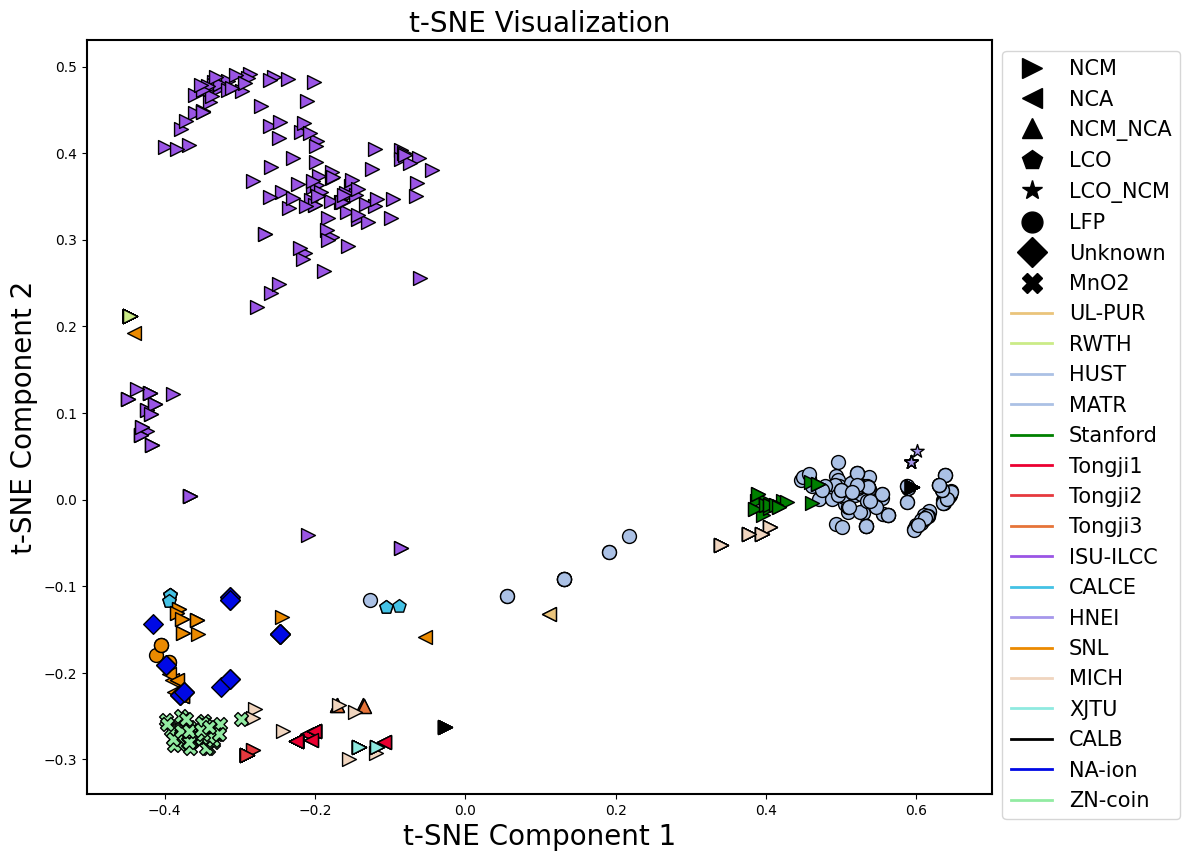

In [37]:


data_path = '/data/trf/python_works/BatteryLife/dataset/training_DKP_embed_all.pkl'
data = pickle.load(open(data_path, 'rb'))
tmp_total_features = np.array(list(data.values())).squeeze(1)
names = list(data.keys())


# Perform t-SNE on the embeddings (total_features)
tsne = KernelPCA(n_components=2, random_state=42, kernel='rbf')  # Reduce to 2D for visualization
tsne_results = tsne.fit_transform(tmp_total_features)
dataset_names = [name.split('_')[0] for name in names]

fig = plt.figure(figsize=(12, 9))
# Define a list of different shapes for the clusters
cathodes_data = json.load(open('./gate_data/cathodes.json'))
cathode_names = ['_'.join(cathodes_data[i+'.pkl']) for i in names]

dataset_shape_map = {
    'NCM': '>',
    'NCA': '<',
    'NCM_NCA':'^',
    'LCO': 'p',
    'LCO_NCM': '*',
    'LFP': 'o',
    'Unknown': 'D',
    'MnO2': 'X'
}

dataset_color = {
    'UL-PUR': '#EAC47B',
    'RWTH': '#CBEB87',
    'HUST':'#ABC1E5',
    'MATR': '#ABC1E5',
    'Stanford': 'green',
    'Tongji1': '#EB0031',
    'Tongji2': '#E6393E',
    'Tongji3': '#E67439',
    'ISU-ILCC': '#9A55E5',
    'CALCE': '#44C2E5',
    'HNEI': '#A697EB',
    'SNL': '#EB8A00',
    'MICH': '#F0D5BF',
    'XJTU': '#8FEAE0',
    'CALB': 'black',
    'NA-ion': '#0009E5',
    'ZN-coin': '#92EBA2'
}

appear_cathodeNames = []
for i in range(len(tmp_total_features)):
    if cathode_names[i] not in appear_cathodeNames:
        plt.scatter(tsne_results[i, 0], tsne_results[i, 1],
                    c=dataset_color[dataset_names[i]],  # Color by cluster label
                    marker=dataset_shape_map[cathode_names[i]],  # Shape by dataset name
                     s=100, edgecolor='k', label=cathode_names[i])
    else:
        plt.scatter(tsne_results[i, 0], tsne_results[i, 1],
                    c=dataset_color[dataset_names[i]],  # Color by cluster label
                    marker=dataset_shape_map[cathode_names[i]],  # Shape by dataset name
                    s=100, edgecolor='k')
    appear_cathodeNames.append(cathode_names[i])

# Add labels and title
plt.title("t-SNE Visualization", fontsize=20)
plt.xlabel("t-SNE Component 1", fontsize=20)
plt.ylabel("t-SNE Component 2", fontsize=20)

# Custom legend for cluster shapes only (no color distinction)
legend_shapes = [Line2D([], [], marker=shape, color='black', linestyle='None', markersize=15, label=name) for name, shape in dataset_shape_map.items()]
legend_colors = [Line2D([], [], marker='None', color=color, linestyle='-', markersize=15, label=name, lw=2) for name, color in dataset_color.items()]
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1), fontsize=15, handles=legend_shapes+legend_colors)

set_ax_linewidth(plt.gca())
fig.tight_layout()
# plt.savefig('./figures/t-SNE_clustering.jpg', dpi=600, bbox_inches='tight')
plt.show()